# Спецификация к Лабораторной работе №9 

# Поиск строки или столбца матрицы по условию. 
# Обработка исключений.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки матрицы в соответствии с условием. 

#### Условие: 
Проанализировать матрицу. 

Проверить, все ли столбцы матрицы упорядочены по неубыванию.

Если не все, сообщить номер последнего неупорядоченного.

### 2. Уточненная постановка задачи.
Дана матрица $A$, состоящая из n строк и m столбцов. 

Проанализировать столбцы с номерами $i \in \{1, ..., m\}$,

выполняется ли условие $A_{1i} \leq A_{2i} \leq  ... \leq A_{ni} (*)$

Если не для всех, сообщить наибольший номер $N$ столбца, 

для которого $(*)$ не выполняется.

### 3. Пример с иллюстрацией.

In [1]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [2]:
A1 = numpy.random.randint(-100, 100, size=(4,5))
numpy.savetxt('A_Lab9_1.txt', A1, fmt='%5.0f')
print(A1)

[[ 84  73 -20 -62 -47]
 [ 13  40 -96  16 -47]
 [ 51 -31  66 -43  39]
 [-94  70 -12 -13 -15]]


In [3]:
A2 = numpy.random.randint(0, 2, size=(3,5))
numpy.savetxt('A_Lab9_2.txt', A2, fmt='%5.0f')
print(A2, '\n\n', A2.shape)

[[1 1 0 1 1]
 [0 0 0 0 0]
 [1 0 1 0 0]] 

 (3, 5)


In [4]:
A2 == numpy.sort(A2, axis=0)

array([[False, False,  True, False, False],
       [False,  True,  True,  True,  True],
       [ True, False,  True, False, False]])

In [5]:
numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0)

array([1, 1, 3, 1, 1])

In [6]:
numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0]

array([ True,  True, False,  True,  True])

In [7]:
sum(numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0]) != 0 

True

In [8]:
numpy.nonzero(numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0])[0][-1] + 1

5

In [9]:
A3 = numpy.random.randint(0, 5, size=(3,5))
numpy.savetxt('A_Lab9_3.txt', A3, fmt='%5.0f')
print(A3, '\n\n', A3.shape)

[[4 0 4 2 4]
 [3 3 3 2 3]
 [1 4 2 4 3]] 

 (3, 5)


In [13]:
A4 = numpy.random.randint(-10, 0, size=(3,7))
numpy.savetxt('A_Lab9_4.txt', A4, fmt='%5.0f')
print(A4, '\n\n', A4.shape)

[[-4 -9 -3 -9 -6 -8 -6]
 [-4 -1 -1 -6 -1 -8 -7]
 [-8 -8 -8 -1 -8 -2 -6]] 

 (3, 7)


In [43]:
A5 = numpy.random.uniform(-5, 5, size=(3,10))
numpy.savetxt('A_Lab9_5.txt', A5, fmt='%1.6f')
print(A5, '\n\n', A5.shape)

[[ 4.65686407  4.04533509 -3.30944422  3.04703298 -2.82836498 -1.33122366
  -3.73740085 -3.81033447 -1.26949406  4.76996665]
 [ 1.7333839  -1.78020585  3.62076868 -1.8891421   2.21228912  3.43417954
   2.83782822  1.70289398 -1.8955828   3.05625326]
 [ 2.75286188 -4.36364877 -3.17314753  0.3313719   3.52666878 -4.240443
  -3.88176302  4.44243148  0.30038683  1.13223991]] 

 (3, 10)


In [44]:
print(20*' ' + 'Лаб.9\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы A: '))
fout = str(input('Текстовый файл с элементами матрицы A и номером столбца N: '))

print(90*'=' + '\n' + 'Исходная матрица A: \n')
A = numpy.loadtxt(fin, dtype='float')
print(A)

if sum(numpy.sum(A == numpy.sort(A, axis=0), axis=0) < A.shape[0]) != 0:
    N = numpy.nonzero(numpy.sum(A == numpy.sort(A, axis=0), axis=0) < A.shape[0])[0][-1] + 1

    print(90*'=' + '\n' + 'Наибольший номер неупорядоченного столбца N (по неубыванию): \n')
    print(N)
else:
    N = 0
    print(90*'=' + '\n' + 'Все столбцы матрицы сортированы по неубыванию)')
    
with open(fout, 'w') as f:
    for i in range(len(A)):
        f.write("{}\n".format(A[i]))
    f.write("{}\n".format(N))

                    Лаб.9
Текстовый файл с элементами матрицы A: A_Lab9_5.txt
Текстовый файл с элементами матрицы A и номером столбца N: AN_Lab9_5.txt
Исходная матрица A: 

[[ 4.656864  4.045335 -3.309444  3.047033 -2.828365 -1.331224 -3.737401
  -3.810334 -1.269494  4.769967]
 [ 1.733384 -1.780206  3.620769 -1.889142  2.212289  3.43418   2.837828
   1.702894 -1.895583  3.056253]
 [ 2.752862 -4.363649 -3.173148  0.331372  3.526669 -4.240443 -3.881763
   4.442431  0.300387  1.13224 ]]
Наибольший номер неупорядоченного столбца N (по неубыванию): 

10


In [28]:
numpy.sum(A == numpy.sort(A, axis=0)[i], axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
A[:,1]

array([  0.710768, -17.353336])

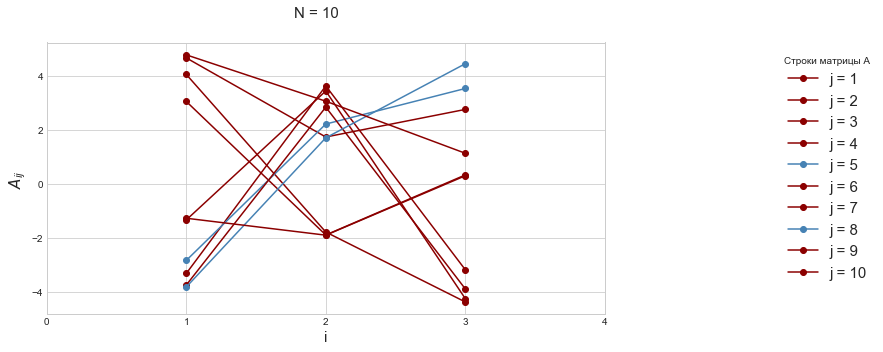

In [48]:
pylab.figure(figsize=(10,5))
col = ['steelblue', 'darkred']
s = numpy.sum(A == numpy.sort(A, axis=0), axis=0) < A.shape[0]
for i in range(A.shape[1]):
    pylab.plot(range(A.shape[0]), A[:,i], 
               '-o', c=col[int(s[i])], 
               label='j = ' + str(i+1))

pylab.suptitle('N = ' + str(N), fontsize=15)
pylab.xlabel('i', fontsize=15) 
pylab.ylabel(r'$A_{ij}$', fontsize=15)
pylab.xticks(range(-1, A.shape[0]+1), range(A.shape[0]+2));
pylab.legend(title='Строки матрицы A', 
             fontsize=15, shadow=True, 
             bbox_to_anchor=(1.5,1.0));